<a href="https://colab.research.google.com/github/Team-4-COV19-Research-grp/Time-Series-for-Covid-Prediction_New/blob/main/Time_Series_for_Covid_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

Write about the dataset

Each columns

The pre-processing steps


# **Loading the dataset**

In [ ]:
# # df20 = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/term2_TimeSeries4CoViD/INFLUD20-23-01-2023.csv', delimiter=";")
# df20 = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/term2_TimeSeries4CoViD/INFLUD20-23-01-2023.csv', sep = ';')
# df20.head()

In [ ]:
df21 = pd.read_csv("/content/drive/MyDrive/INFLUD21-23-01-2023.csv", delimiter=";")
df21.head()

In [ ]:
df21.info()

In [ ]:
df21.describe()

In [ ]:
df21.columns
pd.set_option('display.max_columns', None)

In [ ]:
df22 = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/term2_TimeSeries4CoViD/INFLUD22-23-01-2023.csv", delimiter=";")
pd.set_option('display.max_columns', None)
# write to rename the columns to English
df22.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (15,59,61,62,63,91,93,105,107,120,122,143) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,CO_UNI_NOT,CS_SEXO,DT_NASC,NU_IDADE_N,TP_IDADE,COD_IDADE,CS_GESTANT,CS_RACA,CS_ESCOL_N,ID_PAIS,CO_PAIS,SG_UF,ID_RG_RESI,CO_RG_RESI,ID_MN_RESI,CO_MUN_RES,CS_ZONA,SURTO_SG,NOSOCOMIAL,AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,OUTRO_SIN,OUTRO_DES,PUERPERA,FATOR_RISC,CARDIOPATI,HEMATOLOGI,SIND_DOWN,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,OBES_IMC,OUT_MORBI,MORB_DESC,VACINA,DT_UT_DOSE,MAE_VAC,DT_VAC_MAE,M_AMAMENTA,DT_DOSEUNI,DT_1_DOSE,DT_2_DOSE,ANTIVIRAL,TP_ANTIVIR,OUT_ANTIV,DT_ANTIVIR,HOSPITAL,DT_INTERNA,SG_UF_INTE,ID_RG_INTE,CO_RG_INTE,ID_MN_INTE,CO_MU_INTE,UTI,DT_ENTUTI,DT_SAIDUTI,SUPORT_VEN,RAIOX_RES,RAIOX_OUT,DT_RAIOX,AMOSTRA,DT_COLETA,TP_AMOSTRA,OUT_AMOST,PCR_RESUL,DT_PCR,POS_PCRFLU,TP_FLU_PCR,PCR_FLUASU,FLUASU_OUT,PCR_FLUBLI,FLUBLI_OUT,POS_PCROUT,PCR_VSR,PCR_PARA1,PCR_PARA2,PCR_PARA3,PCR_PARA4,PCR_ADENO,PCR_METAP,PCR_BOCA,PCR_RINO,PCR_OUTRO,DS_PCR_OUT,CLASSI_FIN,CLASSI_OUT,CRITERIO,EVOLUCAO,DT_EVOLUCA,DT_ENCERRA,DT_DIGITA,HISTO_VGM,PAIS_VGM,CO_PS_VGM,LO_PS_VGM,DT_VGM,DT_RT_VGM,PCR_SARS2,PAC_COCBO,PAC_DSCBO,OUT_ANIM,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,TOMO_RES,TOMO_OUT,DT_TOMO,TP_TES_AN,DT_RES_AN,RES_AN,POS_AN_FLU,TP_FLU_AN,POS_AN_OUT,AN_SARS2,AN_VSR,AN_PARA1,AN_PARA2,AN_PARA3,AN_ADENO,AN_OUTRO,DS_AN_OUT,TP_AM_SOR,SOR_OUT,DT_CO_SOR,TP_SOR,OUT_SOR,DT_RES,RES_IGG,RES_IGM,RES_IGA,ESTRANG,VACINA_COV,DOSE_1_COV,DOSE_2_COV,DOSE_REF,FAB_COV_1,FAB_COV_2,FAB_COVREF,LAB_PR_COV,LOTE_1_COV,LOTE_2_COV,LOTE_REF,FNT_IN_COV
0,05/01/2022,1,04/01/2022,1,CE,1 CRES FORTALEZA,1519.0,FORTALEZA,230440,HOSPITAL HAROLDO JUACABA,2723220,M,16/11/1967,54,3,3054,6,4,NaN,BRASIL,1,CE,6 CRES ITAPIPOCA,1515.0,TRAIRI,231350.0,1.0,NaN,2.0,9.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,DOR TORACICA,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,CEC OROFARINGE,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1.0,04/01/2022,CE,1 CRES FORTALEZA,1519.0,FORTALEZA,230440.0,2.0,NaN,NaN,3.0,NaN,NaN,NaN,1.0,05/01/2022,1.0,NaN,2.0,06/01/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,1.0,NaN,NaN,05/01/2022,05/01/2022,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,04/01/2022,1,03/01/2022,1,SP,GVE I CAPITAL,1331.0,SAO PAULO,355030,HOSPITAL SANTA CATARINA,2688603,F,17/03/2011,10,3,3010,5,9,NaN,BRASIL,1,SP,GVE I CAPITAL,1331.0,SAO PAULO,355030.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,DOR NO CORPO E ALUCINACOES,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,04/01/2022,SP,NaN,NaN,SAO PAULO,355030.0,2.0,NaN,NaN,9.0,NaN,NaN,NaN,1.0,04/01/2022,1.0,NaN,2.0,05/01/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,05/01/2022,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,04/01/2022,1,03/01/2022,1,SP,GVE XXVII SAO JOSE DOS CAMPOS,1351.0,SAO JOSE DOS CAMPOS,354990,SANTOS DUMONT PRONTO ATENDIMENTO UNIDADE VILACA,3199770,M,02/04/1940,81,3,3081,6,1,NaN,BRASIL,1,SP,GVE XXVII SAO JOSE DOS CAMPOS,1351.0,SAO JOSE DOS CAMPOS,354990.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1.0,05/01/2022,SP,GVE XXVII SAO JOSE DOS CAMPOS,1351.0,SAO JOSE DOS CAMPOS,354990.0,2.0,NaN,NaN,2.0,NaN,NaN,NaN,1.0,04/01/2022,1.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,1.0,9.0,NaN,06/01/2022,06/01/2022,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,2.0,04/01/2022,1.0,NaN,NaN,1

In [ ]:
df22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561242 entries, 0 to 561241
Columns: 166 entries, DT_NOTIFIC to FNT_IN_COV
dtypes: float64(92), int64(12), object(62)
memory usage: 710.8+ MB


In [ ]:
df22.describe()

,SEM_NOT,SEM_PRI,CO_REGIONA,CO_MUN_NOT,CO_UNI_NOT,NU_IDADE_N,TP_IDADE,CS_GESTANT,CS_RACA,CS_ESCOL_N,CO_PAIS,CO_RG_RESI,CO_MUN_RES,CS_ZONA,SURTO_SG,NOSOCOMIAL,AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,OUTRO_SIN,PUERPERA,FATOR_RISC,CARDIOPATI,HEMATOLOGI,SIND_DOWN,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,OUT_MORBI,VACINA,MAE_VAC,M_AMAMENTA,ANTIVIRAL,TP_ANTIVIR,HOSPITAL,CO_RG_INTE,CO_MU_INTE,UTI,SUPORT_VEN,RAIOX_RES,AMOSTRA,TP_AMOSTRA,PCR_RESUL,POS_PCRFLU,TP_FLU_PCR,PCR_FLUASU,PCR_FLUBLI,POS_PCROUT,PCR_VSR,PCR_PARA1,PCR_PARA2,PCR_PARA3,PCR_PARA4,PCR_ADENO,PCR_METAP,PCR_BOCA,PCR_RINO,PCR_OUTRO,CLASSI_FIN,CRITERIO,EVOLUCAO,HISTO_VGM,PAIS_VGM,CO_PS_VGM,LO_PS_VGM,DT_VGM,DT_RT_VGM,PCR_SARS2,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,TOMO_RES,TP_TES_AN,RES_AN,POS_AN_FLU,TP_FLU_AN,POS_AN_OUT,AN_SARS2,AN_VSR,AN_PARA1,AN_PARA2,AN_PARA3,AN_ADENO,AN_OUTRO,TP_AM_SOR,TP_SOR,RES_IGG,RES_IGM,RES_IGA,ESTRANG,VACINA_COV,FNT_IN_COV
count,561242.000000,561242.000000,502850.000000,561242.000000,5.612420e+05,561242.000000,561242.000000,561242.000000,561242.000000,348015.000000,561242.000000,505353.000000,561112.000000,503410.000000,0.0,480865.000000,467626.000000,450032.000000,481979.000000,382175.000000,461432.000000,431842.000000,437551.000000,369297.000000,372662.000000,376440.000000,188917.000000,561242.000000,240355.000000,190404.000000,189593.000000,189404.000000,196839.000000,222301.000000,199639.000000,198249.000000,194217.000000,194746.000000,191793.000000,234457.000000,331523.000000,15650.000000,13787.000000,449654.000000,18930.000000,542705.000000,447694.000000,500643.000000,475242.000000,471631.000000,329885.000000,534763.000000,508693.000000,505385.000000,109195.000000,8874.000000,8750.000000,70.000000,139444.000000,15937.0,159.0,131.0,1002.0,252.0,3647.0,2519.0,1150.0,8503.0,1232.0,519811.000000,506733.000000,490005.000000,561242.0,0.0,0.0,0.0,0.0,0.0,103407.0,364580.000000,377879.000000,359243.000000,358825.000000,323341.000000,241764.000000,505836.000000,79027.000000,3201.000000,102755.000000,94574.0,3333.0,41.0,7.0,47.0,94.0,509.0,20024.000000,11638.000000,46806.000000,47030.000000,44566.000000,510102.000000,560301.000000,561242.000000
mean,20.256422,19.608579,1535.537574,345223.894245,3.191618e+06,48.108196,2.883227,5.787537,3.483260,5.363734,1.024082,1565.804812,345073.952054,1.236181,NaN,2.377093,3.062879,1.484108,1.285602,1.994602,1.355795,1.457855,1.436777,2.033133,2.000131,1.756097,2.092517,1.450847,1.476770,2.091064,2.090573,2.093609,1.972922,1.674477,1.935383,1.949326,2.016440,1.998429,2.048954,1.468551,5.402802,6.179617,4.628273,2.960432,1.171474,1.037308,1533.833648,348877.704220,1.811441,2.437359,4.935020,1.067654,1.232171,2.642856,2.486890,1.013973,2.364914,3.285714,1.054839,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.251857,1.173606,1.483440,0.0,NaN,NaN,NaN,NaN,NaN,1.0,2.105151,1.905914,2.238142,2.245833,5.099820,1.951995,3.178558,2.680881,1.097782,1.093708,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.223332,1.528269,3.942016,3.885499,4.141588,1.991635,1.589381,1.872588
std,15.422819,15.590281,581.693916,84968.066042,2.364150e+06,32.593404,0.344124,0.808895,2.819138,3.522351,1.685941,686.056825,85123.298437,1.141159,NaN,1.671499,2.526356,0.981777,0.843874,1.250838,0.891556,0.970566,0.978898,1.064896,1.072329,1.286557,0.857925,0.497579,0.849685,0.928651,0.860449,0.922417,0.919155,0.896376,0.945277,0.960839,0.956209,0.924680,1.050588,0.907046,3.656263,3.555644,3.801298,2.486288,0.553417,0.378730,578.978062,83940.383916,1.042406,1.408644,2.451545,0.574098,0.834115,1.588316,1.954976,0.117387,0.815457,0.819028,0.354579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.925608,0.587406,1.429013,0.0,NaN,NaN,NaN,NaN,NaN,0.0,1.196382,1.169370,1.346710,1.366989,2.329467,0.213778,1.730523,2.151440,0.297066,0.700286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.761992,1.086141,1.324182,1.364289,1.195306,0.091077,1.337192,0.333434
min,1.000000,1.000000,1331.000000,110001.000000,1.900000e+01,-9.000000,1.000000,0.000000,1

In [ ]:
# Check for city with the highest cases

df22['CO_UNI_NOT'].max()

# print(" ..." + df22['CO_UNI_NOT'].max() + " cases in  " + df22['ID_MUNICIP'] + " city in Year 2022")

9997091

<AxesSubplot:>

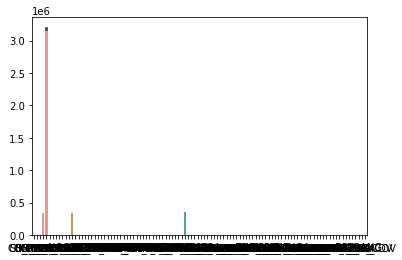

In [ ]:
# Plot city Values to visualize highest count
sns.barplot(data = df22)
# sns.countplot(y = df22['ID_MUNICIP'])

In [ ]:
# Plot horizontally to make more space for category labels:

sns.countplot(data=df22, y="City", hue="alive")

In [ ]:
df22.columns.values

# pd.set_option('display.max_columns', None)
# print(df22.columns.values)

array(['DT_NOTIFIC', 'SEM_NOT', 'DT_SIN_PRI', 'SEM_PRI', 'SG_UF_NOT',
       'ID_REGIONA', 'CO_REGIONA', 'ID_MUNICIP', 'CO_MUN_NOT',
       'ID_UNIDADE', 'CO_UNI_NOT', 'CS_SEXO', 'DT_NASC', 'NU_IDADE_N',
       'TP_IDADE', 'COD_IDADE', 'CS_GESTANT', 'CS_RACA', 'CS_ESCOL_N',
       'ID_PAIS', 'CO_PAIS', 'SG_UF', 'ID_RG_RESI', 'CO_RG_RESI',
       'ID_MN_RESI', 'CO_MUN_RES', 'CS_ZONA', 'SURTO_SG', 'NOSOCOMIAL',
       'AVE_SUINO', 'FEBRE', 'TOSSE', 'GARGANTA', 'DISPNEIA', 'DESC_RESP',
       'SATURACAO', 'DIARREIA', 'VOMITO', 'OUTRO_SIN', 'OUTRO_DES',
       'PUERPERA', 'FATOR_RISC', 'CARDIOPATI', 'HEMATOLOGI', 'SIND_DOWN',
       'HEPATICA', 'ASMA', 'DIABETES', 'NEUROLOGIC', 'PNEUMOPATI',
       'IMUNODEPRE', 'RENAL', 'OBESIDADE', 'OBES_IMC', 'OUT_MORBI',
       'MORB_DESC', 'VACINA', 'DT_UT_DOSE', 'MAE_VAC', 'DT_VAC_MAE',
       'M_AMAMENTA', 'DT_DOSEUNI', 'DT_1_DOSE', 'DT_2_DOSE', 'ANTIVIRAL',
       'TP_ANTIVIR', 'OUT_ANTIV', 'DT_ANTIVIR', 'HOSPITAL', 'DT_INTERNA',
       'SG_UF_INTE

In [ ]:
df22.columns.value_counts

<bound method IndexOpsMixin.value_counts of Index(['DT_NOTIFIC', 'SEM_NOT', 'DT_SIN_PRI', 'SEM_PRI', 'SG_UF_NOT',
       'ID_REGIONA', 'CO_REGIONA', 'ID_MUNICIP', 'CO_MUN_NOT', 'ID_UNIDADE',
       ...
       'DOSE_2_COV', 'DOSE_REF', 'FAB_COV_1', 'FAB_COV_2', 'FAB_COVREF',
       'LAB_PR_COV', 'LOTE_1_COV', 'LOTE_2_COV', 'LOTE_REF', 'FNT_IN_COV'],
      dtype='object', length=166)>

In [ ]:
# create a new dataset with the feature columns

new_df22 = df22[['DT_NOTIFIC', 'SEM_NOT', 'DT_SIN_PRI', 'SEM_PRI', 'FEBRE', 'TOSSE', 'GARGANTA', 'DISPNEIA', 'DESC_RESP', 'SATURACAO', 'DIARREIA', 'VOMITO', 'OUTRO_SIN', 'OUTRO_DES', 'DOR_ABD', 'FADIGA', 'PERD_OLFT', 'PERD_PALA']].copy()

In [ ]:
new_df22.columns

Index(['DT_NOTIFIC', 'SEM_NOT', 'DT_SIN_PRI', 'SEM_PRI', 'FEBRE', 'TOSSE',
       'GARGANTA', 'DISPNEIA', 'DESC_RESP', 'SATURACAO', 'DIARREIA', 'VOMITO',
       'OUTRO_SIN', 'OUTRO_DES', 'DOR_ABD', 'FADIGA', 'PERD_OLFT',
       'PERD_PALA'],
      dtype='object')

# **Feature Selection-based symptom**

About the dataset 



1-Date of filling in the notification form ==> 								  Date must be <= the date of entry.

Epidemiological week for completing the notification form ==> Week Epidemiology of completing the form => Calculated from the date of First Symptoms.

2-Date of 1st symptoms ==> Date of 1st case symptoms. => Date must be <= the date of typing and date of filling in the notification form

First Epidemiological Week sYMPTOMS ===> Week Epidemiology of symptom onset. => Calculated from the date of First Symptoms.

[['FEVER', 'COUGH', 'THROAT', 'DYSPNEA', 'DESC_RESP', 'SATURACAO', 'DIARRHEA', 'VOMIT', 'DOR_USA', 'FATIGUE', 'PERD_OLFT', 'PERD_PALA', 'OTHER_SIN', 'OTHER_DES']]

FEBRE - 34-Signs and Symptoms/Fever

TOSSE - 34-Signs and Symptoms/Cough

GARGANTA - 34-Signs and Symptoms/Sore Throat

DISPNEIA - 34-Signs and Symptoms/Dyspnea

DESC_RESP - 34-Signs and Symptoms/Discomfort Respiratory

SATURACAO - 34-Signs and Symptoms/Saturation O2< 95%

DIARREIA - 34-Signs and Symptoms/Diarrhea

VOMITO - 34-Signs and Symptoms/Vomiting

DOR_ABD - 34-Signs and Symptoms/Abdominal pain

FADIGA - 34-Signs and Symptoms/Fatigue

PERD_OLFT - 34-Signs and Symptoms/Loss of Smell

PERD_PALA - 34-Signs and Symptoms/Loss of Taste

OUTRO_SIN - 34-Signs and Symptoms/Others

OUTRO_DES - 34-Signs " Symptoms/Other

In [ ]:
new_df22.head()

,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,OUTRO_SIN,OUTRO_DES,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA
0,05/01/2022,1,04/01/2022,1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,DOR TORACICA,NaN,NaN,NaN,NaN
1,04/01/2022,1,03/01/2022,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,DOR NO CORPO E ALUCINACOES,NaN,NaN,NaN,NaN
2,04/01/2022,1,03/01/2022,1,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
3,08/01/2022,1,05/01/2022,1,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0
4,08/01/2022,1,05/01/2022,1,2.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,PROSTRACAO,2.0,1.0,2.0,2.0


In [ ]:
new_df22.describe()

,SEM_NOT,SEM_PRI,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,OUTRO_SIN,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA
count,561242.000000,561242.000000,450032.000000,481979.000000,382175.000000,461432.000000,431842.000000,437551.000000,369297.000000,372662.000000,376440.000000,364580.000000,377879.000000,359243.000000,358825.000000
mean,20.256422,19.608579,1.484108,1.285602,1.994602,1.355795,1.457855,1.436777,2.033133,2.000131,1.756097,2.105151,1.905914,2.238142,2.245833
std,15.422819,15.590281,0.981777,0.843874,1.250838,0.891556,0.970566,0.978898,1.064896,1.072329,1.286557,1.196382,1.169370,1.346710,1.366989
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,6.000000,5.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000
50%,19.000000,18.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,30.000000,30.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,52.000000,52.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [ ]:
new_df22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561242 entries, 0 to 561241
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   DT_NOTIFIC  561242 non-null  object 
 1   SEM_NOT     561242 non-null  int64  
 2   DT_SIN_PRI  561242 non-null  object 
 3   SEM_PRI     561242 non-null  int64  
 4   FEBRE       450032 non-null  float64
 5   TOSSE       481979 non-null  float64
 6   GARGANTA    382175 non-null  float64
 7   DISPNEIA    461432 non-null  float64
 8   DESC_RESP   431842 non-null  float64
 9   SATURACAO   437551 non-null  float64
 10  DIARREIA    369297 non-null  float64
 11  VOMITO      372662 non-null  float64
 12  OUTRO_SIN   376440 non-null  float64
 13  OUTRO_DES   158445 non-null  object 
 14  DOR_ABD     364580 non-null  float64
 15  FADIGA      377879 non-null  float64
 16  PERD_OLFT   359243 non-null  float64
 17  PERD_PALA   358825 non-null  float64
dtypes: float64(13), int64(2), object(3)
memory u

# **Exploratory Data Analysis and Data Cleaning**

In [ ]:
# count all null values in the dataset per columns

new_df22.isnull().sum()

DT_NOTIFIC         0
SEM_NOT            0
DT_SIN_PRI         0
SEM_PRI            0
FEBRE         111210
TOSSE          79263
GARGANTA      179067
DISPNEIA       99810
DESC_RESP     129400
SATURACAO     123691
DIARREIA      191945
VOMITO        188580
OUTRO_SIN     184802
OUTRO_DES     402797
DOR_ABD       196662
FADIGA        183363
PERD_OLFT     201999
PERD_PALA     202417
dtype: int64

In [ ]:
new_df22.isna().sum()

DT_NOTIFIC         0
SEM_NOT            0
DT_SIN_PRI         0
SEM_PRI            0
FEBRE         111210
TOSSE          79263
GARGANTA      179067
DISPNEIA       99810
DESC_RESP     129400
SATURACAO     123691
DIARREIA      191945
VOMITO        188580
OUTRO_SIN     184802
OUTRO_DES     402797
DOR_ABD       196662
FADIGA        183363
PERD_OLFT     201999
PERD_PALA     202417
dtype: int64

In [ ]:
# percentage missing values 

# Calculating the % of Null values in each column for activity data
new_df22.isnull().sum()/new_df22.shape[0]

DT_NOTIFIC    0.000000
SEM_NOT       0.000000
DT_SIN_PRI    0.000000
SEM_PRI       0.000000
FEBRE         0.198150
TOSSE         0.141228
GARGANTA      0.319055
DISPNEIA      0.177838
DESC_RESP     0.230560
SATURACAO     0.220388
DIARREIA      0.342000
VOMITO        0.336005
OUTRO_SIN     0.329273
OUTRO_DES     0.717689
DOR_ABD       0.350405
FADIGA        0.326709
PERD_OLFT     0.359914
PERD_PALA     0.360659
dtype: float64

In [ ]:
# Getting the count of unique values of each field.
for i in new_df22.columns:
    print(i + " : ",format(len(new_df22[i].value_counts())))

DT_NOTIFIC :  386
SEM_NOT :  52
DT_SIN_PRI :  386
SEM_PRI :  52
FEBRE :  3
TOSSE :  3
GARGANTA :  3
DISPNEIA :  3
DESC_RESP :  3
SATURACAO :  3
DIARREIA :  3
VOMITO :  3
OUTRO_SIN :  3
OUTRO_DES :  44018
DOR_ABD :  3
FADIGA :  3
PERD_OLFT :  3
PERD_PALA :  3


In [ ]:
# Getting the unique values of each field
for i in new_df22.columns:
    print(i + " : ",format((new_df22[i].value_counts())))
    print("\n")

DT_NOTIFIC :  24/01/2022    6350
17/01/2022    5534
26/01/2022    5490
31/01/2022    5448
25/01/2022    5416
              ... 
15/01/2023     254
14/01/2023     220
02/01/2022     172
21/01/2023      81
22/01/2023      59
Name: DT_NOTIFIC, Length: 386, dtype: int64


SEM_NOT :  3     34741
4     33374
2     28356
5     28099
6     22656
7     17839
1     15467
25    14963
26    14950
27    14123
8     14059
23    13124
28    12922
24    12609
22    12464
21    11059
29    10788
9     10467
10     9797
20     9681
47     9242
48     9166
50     8980
11     8941
49     8763
30     8663
19     8472
17     8255
12     8236
13     7990
46     7739
18     7635
51     7597
31     7397
14     7357
16     7177
32     7001
15     6938
52     6778
33     6672
34     6290
45     5875
35     5822
38     5062
37     5038
36     4935
39     4856
42     4830
40     4795
43     4600
44     4313
41     4289
Name: SEM_NOT, dtype: int64


DT_SIN_PRI :  20/01/2022    6647
10/01/2022    6189
15/01/2022    

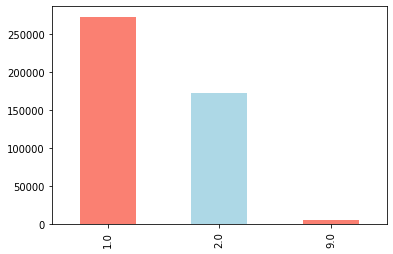

In [ ]:
# Checking the count of unique vales of FEVER field.
new_df22['FEBRE'].value_counts().plot(kind="bar", color=["salmon", "lightblue"])

<AxesSubplot:>

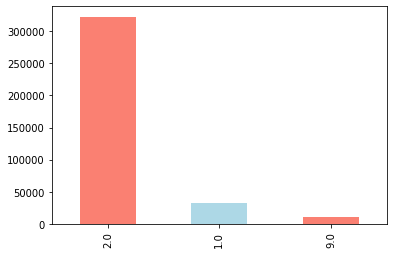

In [ ]:
new_df22['DOR_ABD'].value_counts().plot(kind="bar", color=["salmon", "lightblue"])

In [ ]:
# Replace null values in FEBRE column with 9 i.e. 9 is counted as "ignored" or patient does not have the symptoms
replace_nan = 9
# new_df22['FEBRE'] = new_df22['FEBRE'].replace(np.nan, 9) # numpy fill
# new_df22['FEBRE'] = new_df22['FEBRE'].fillna(replace_nan) # pandas fill
new_df22.fillna(replace_nan, inplace=True)

In [ ]:

#Create date related features for 'date' in DT_NOTIFIC (date of entry/registration) data
new_df22["DT_NOTIFIC"] = pd.to_datetime(new_df22["DT_NOTIFIC"])
new_df22["Year"] = new_df22["DT_NOTIFIC"].dt.year
new_df22["Month"] = new_df22["DT_NOTIFIC"].dt.month
new_df22["Quarter"] = new_df22["DT_NOTIFIC"].dt.quarter
new_df22["Week"] = new_df22["DT_NOTIFIC"].dt.week
new_df22["WeekDay"] = new_df22["DT_NOTIFIC"].dt.weekday
new_df22["Day"] = new_df22["DT_NOTIFIC"].dt.day

#Create date related features for 'date' in DT_SIN_PRI (date of first symptom) data
new_df22["DT_SIN_PRI"] = pd.to_datetime(new_df22["DT_SIN_PRI"])
new_df22["DT_SIN_Year"] = new_df22["DT_SIN_PRI"].dt.year
new_df22["DT_SIN_Month"] = new_df22["DT_SIN_PRI"].dt.month
new_df22["DT_SIN_Quarter"] = new_df22["DT_SIN_PRI"].dt.quarter
new_df22["DT_SIN_Week"] = new_df22["DT_SIN_PRI"].dt.week
new_df22["DT_SIN_WeekDay"] = new_df22["DT_SIN_PRI"].dt.weekday
new_df22["DT_SIN_Day"] = new_df22["DT_SIN_PRI"].dt.day

#Delete the original date columns
del(new_df22["DT_NOTIFIC"])
del(new_df22["DT_SIN_PRI"])
print("Shape of data after create Date Features:",new_df22.shape)

<ipython-input-27-a536f64f80d7>:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  new_df22["Week"] = new_df22["DT_NOTIFIC"].dt.week
<ipython-input-27-a536f64f80d7>:15: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  new_df22["DT_SIN_Week"] = new_df22["DT_SIN_PRI"].dt.week


Shape of data after create Date Features: (561242, 28)


In [ ]:
new_df22.head()

,SEM_NOT,SEM_PRI,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,OUTRO_SIN,OUTRO_DES,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,Year,Month,Quarter,Week,WeekDay,Day,DT_SIN_Year,DT_SIN_Month,DT_SIN_Quarter,DT_SIN_Week,DT_SIN_WeekDay,DT_SIN_Day
0,1,1,9.0,1.0,9.0,9.0,9.0,9.0,9.0,9.0,1.0,DOR TORACICA,9.0,9.0,9.0,9.0,2022,5,2,17,6,1,2022,4,2,13,4,1
1,1,1,1.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,1.0,DOR NO CORPO E ALUCINACOES,9.0,9.0,9.0,9.0,2022,4,2,13,4,1,2022,3,1,9,1,1
2,1,1,9.0,1.0,1.0,1.0,1.0,1.0,9.0,9.0,9.0,9,9.0,9.0,1.0,1.0,2022,4,2,13,4,1,2022,3,1,9,1,1
3,1,1,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,9,2.0,2.0,2.0,2.0,2022,8,3,31,0,1,2022,5,2,17,6,1
4,1,1,2.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,PROSTRACAO,2.0,1.0,2.0,2.0,2022,8,3,31,0,1,2022,5,2,17,6,1


In [ ]:
new_df22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561242 entries, 0 to 561241
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEM_NOT         561242 non-null  int64  
 1   SEM_PRI         561242 non-null  int64  
 2   FEBRE           561242 non-null  float64
 3   TOSSE           561242 non-null  float64
 4   GARGANTA        561242 non-null  float64
 5   DISPNEIA        561242 non-null  float64
 6   DESC_RESP       561242 non-null  float64
 7   SATURACAO       561242 non-null  float64
 8   DIARREIA        561242 non-null  float64
 9   VOMITO          561242 non-null  float64
 10  OUTRO_SIN       561242 non-null  float64
 11  OUTRO_DES       561242 non-null  object 
 12  DOR_ABD         561242 non-null  float64
 13  FADIGA          561242 non-null  float64
 14  PERD_OLFT       561242 non-null  float64
 15  PERD_PALA       561242 non-null  float64
 16  Year            561242 non-null  int64  
 17  Month     

In [ ]:
new_df22.isnull().sum()

SEM_NOT           0
SEM_PRI           0
FEBRE             0
TOSSE             0
GARGANTA          0
DISPNEIA          0
DESC_RESP         0
SATURACAO         0
DIARREIA          0
VOMITO            0
OUTRO_SIN         0
OUTRO_DES         0
DOR_ABD           0
FADIGA            0
PERD_OLFT         0
PERD_PALA         0
Year              0
Month             0
Quarter           0
Week              0
WeekDay           0
Day               0
DT_SIN_Year       0
DT_SIN_Month      0
DT_SIN_Quarter    0
DT_SIN_Week       0
DT_SIN_WeekDay    0
DT_SIN_Day        0
dtype: int64

In [ ]:
# percentage missing values 

# Calculating the % of Null values in each column for activity data
new_df22.isnull().sum()/new_df22.shape[0]

SEM_NOT           0.0
SEM_PRI           0.0
FEBRE             0.0
TOSSE             0.0
GARGANTA          0.0
DISPNEIA          0.0
DESC_RESP         0.0
SATURACAO         0.0
DIARREIA          0.0
VOMITO            0.0
OUTRO_SIN         0.0
OUTRO_DES         0.0
DOR_ABD           0.0
FADIGA            0.0
PERD_OLFT         0.0
PERD_PALA         0.0
Year              0.0
Month             0.0
Quarter           0.0
Week              0.0
WeekDay           0.0
Day               0.0
DT_SIN_Year       0.0
DT_SIN_Month      0.0
DT_SIN_Quarter    0.0
DT_SIN_Week       0.0
DT_SIN_WeekDay    0.0
DT_SIN_Day        0.0
dtype: float64

In [ ]:
# df22['ID_MUNICIP'].unique()

# uniqueValues = df22['ID_MUNICIP'].nunique()
# print(uniqueValues)

df222 = df22.groupby('ID_REGIONA')['ID_MUNICIP'].nunique()
pd.set_option('display.max_row', None) # 
df22[df22['ID_MUNICIP']] == 'SAO PAULO'
# print(df222)

KeyError: ignored

In [ ]:
def clean_data():
  pass